In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/Data_for_model_training (1).csv")

In [3]:
df.columns

Index(['title', 'label', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [5]:
df.rename(columns={'title': 'text'}, inplace=True)

In [6]:
df

,text,label
0,"Free Speech and the University, Part IV",Right Wing
1,BREAKING: Fauci hints at new lockdowns,Right Wing
2,Economics and Time,Right Wing
3,Forced COVID Vaccination For Kids Is Unlawful,Right Wing
4,"Why ""Voluntarism"" Instead of Voluntaryism? Per...",Right Wing
...,...,...
24442,How do we as socialists respect ‘lived experie...,Left Wing
24443,Western dominance has ended,Left Wing
24444,"Answering skepticism of friends Hi, I'm a uni ...",Left Wing
24445,Haiti was the first free black republic in the...,Left Wing


In [10]:
df.to_csv('cleaned_data.csv', index=False)

In [7]:
_from sklearn.feature_extraction.text import TfidfVectorizer
df['text'].fillna('', inplace=True)


# Assuming 'text' is the column containing textual data
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust the number of features as needed
X_tfidf = vectorizer.fit_transform(df['text'])


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Choosing 2 components for 2D visualization
X_pca = pca.fit_transform(X_tfidf.toarray())  # Convert sparse matrix to dense and apply PCA

# Add the PCA components to the dataframe for easy exploration/visualization
df['pca_one'] = X_pca[:, 0]
df['pca_two'] = X_pca[:, 1]


In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)  # Choosing 2 components for 2D visualization
X_svd = svd.fit_transform(X_tfidf)  # Apply SVD directly to the sparse matrix

# Add the SVD components to the dataframe for easy exploration/visualization
df['svd_one'] = X_svd[:, 0]
df['svd_two'] = X_svd[:, 1]


In [ ]:
df

,text,label,pca_one,pca_two,svd_one,svd_two
0,"Free Speech and the University, Part IV",Right Wing,-0.014772,0.080645,0.163378,0.078608
1,BREAKING: Fauci hints at new lockdowns,Right Wing,-0.178581,0.031185,0.061469,-0.024861
2,Economics and Time,Right Wing,-0.083791,-0.045722,0.101437,-0.051320
3,Forced COVID Vaccination For Kids Is Unlawful,Right Wing,-0.134913,-0.029759,0.078915,-0.056970
4,"Why ""Voluntarism"" Instead of Voluntaryism? Per...",Right Wing,0.051280,-0.111487,0.263293,-0.102769
...,...,...,...,...,...,...
24442,How do we as socialists respect ‘lived experie...,Left Wing,0.197859,-0.028414,0.401864,-0.001989
24443,Western dominance has ended,Left Wing,-0.161171,0.021284,0.027566,-0.005967
24444,"Answering skepticism of friends Hi, I'm a uni ...",Left Wing,0.087671,-0.246245,0.296433,-0.217600
24445,Haiti was the first free black republic in the...,Left Wing,0.223658,-0.105550,0.434327,-0.074961


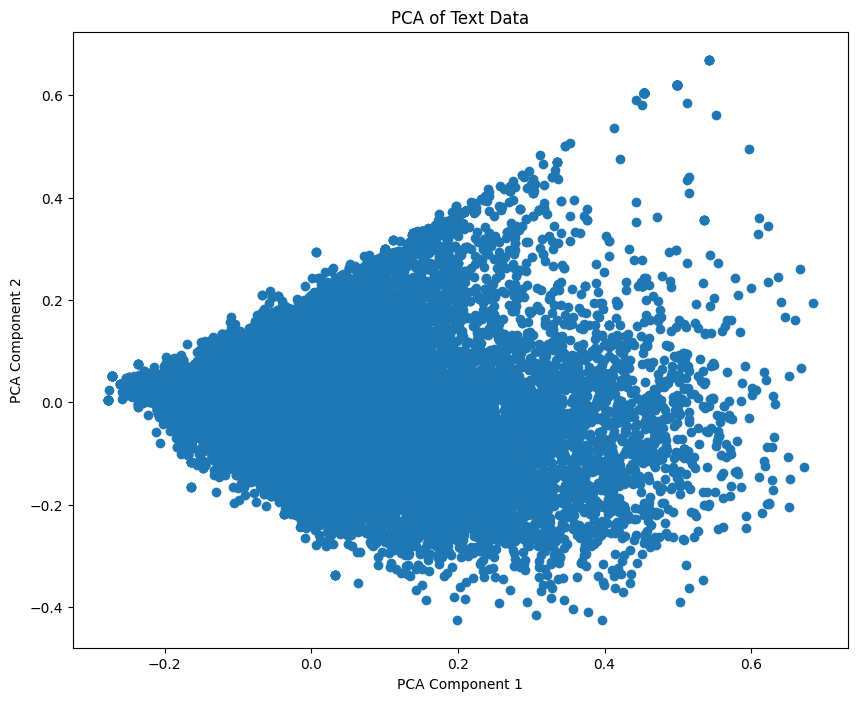

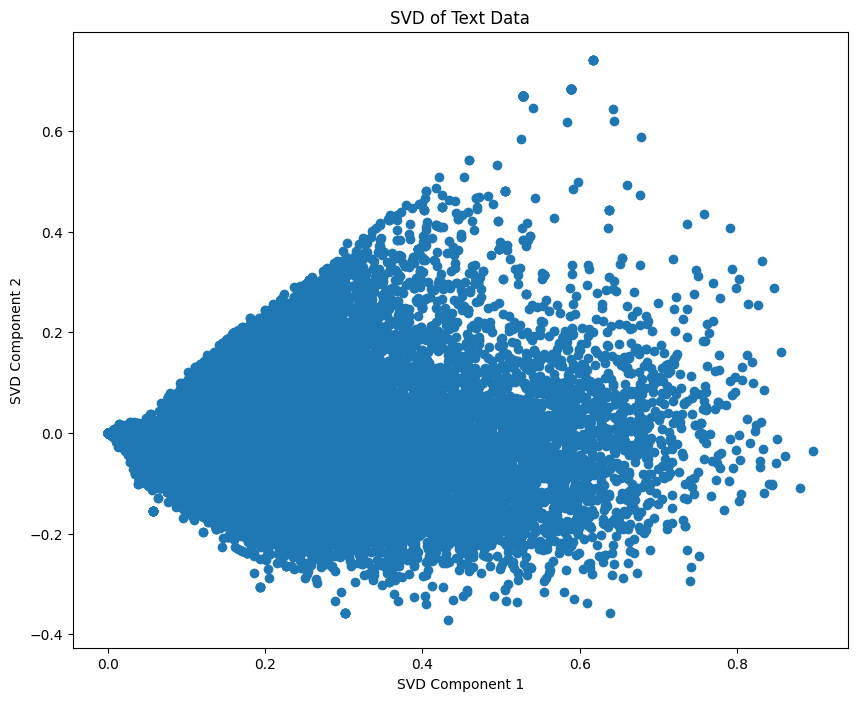

In [ ]:
import matplotlib.pyplot as plt

# Visualize the PCA components
plt.figure(figsize=(10, 8))
plt.scatter(df['pca_one'], df['pca_two'])
plt.title('PCA of Text Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Visualize the SVD components
plt.figure(figsize=(10, 8))
plt.scatter(df['svd_one'], df['svd_two'])
plt.title('SVD of Text Data')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Replace NaN values with an empty string
df['text'].fillna('', inplace=True)

# Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df['text'])

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_tfidf.toarray())

# Get the variance explained by each component
explained_variance = pca.explained_variance_ratio_


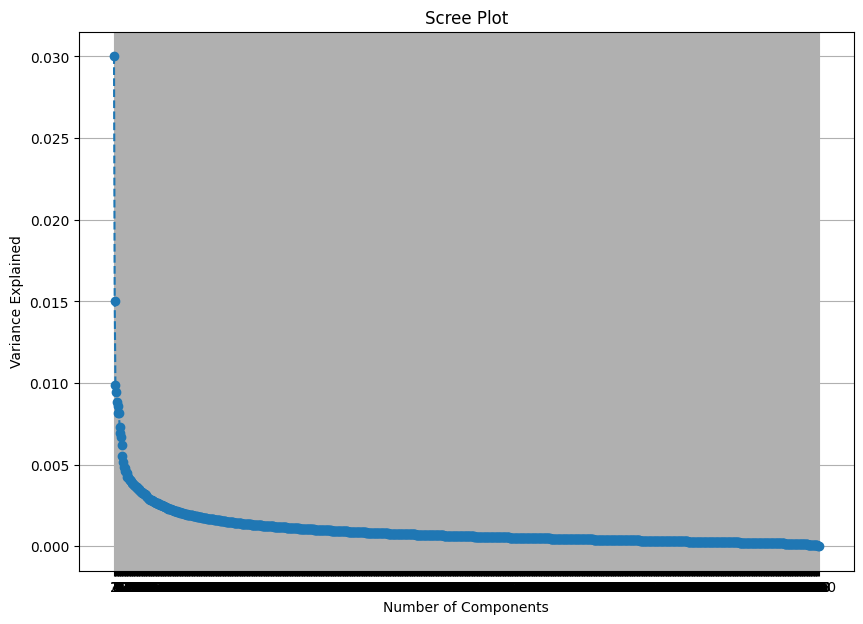

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance) + 1))  # Adding 1 because Python indexes start at 0
plt.grid(True)
plt.show()


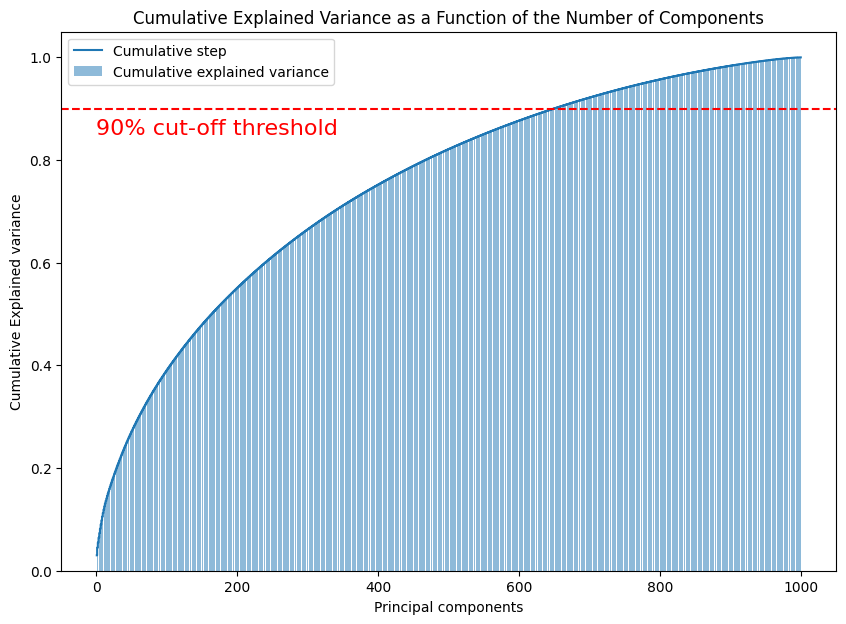

In [ ]:
import numpy as np
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 7))
plt.bar(range(1, len(cumulative_variance) + 1), cumulative_variance, alpha=0.5, align='center', label='Cumulative explained variance')
plt.step(range(1, len(explained_variance) + 1), cumulative_variance, where='mid', label='Cumulative step')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)
plt.legend(loc='best')
plt.show()


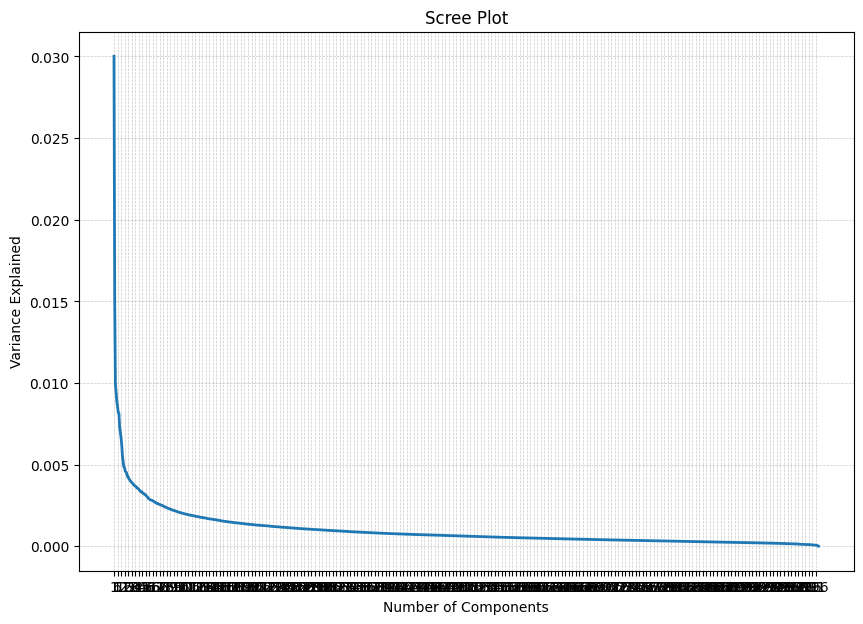

In [ ]:
import matplotlib.pyplot as plt

# Create a scree plot with reduced details
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, linestyle='-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')

# Simplify the x-axis ticks to show every fifth component
plt.xticks(range(1, len(explained_variance) + 1, 5))

# Remove the grid or make it less prominent
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()


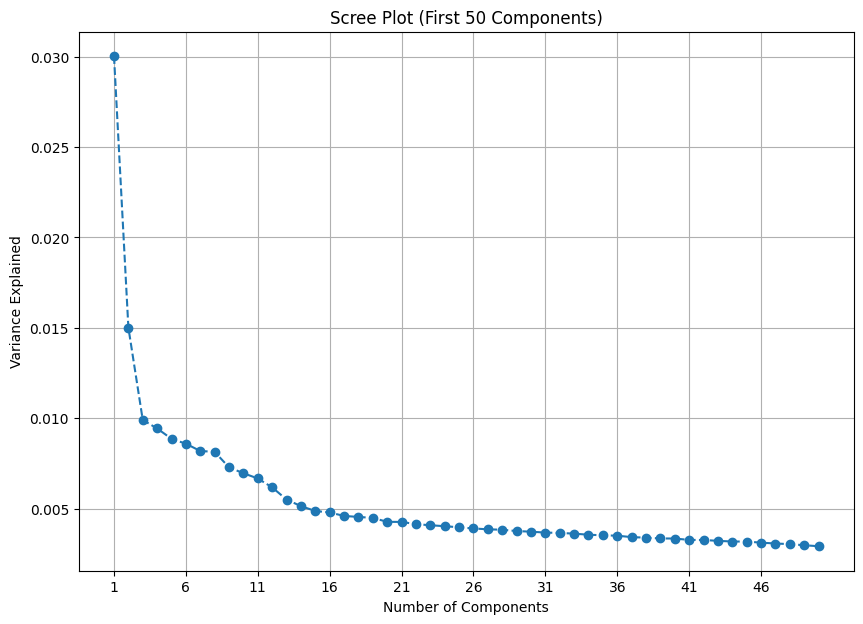

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'explained_variance' holds the variance explained by each component
# and we want to look at the first 50 components more closely
num_components_to_plot = 50

plt.figure(figsize=(10, 7))
plt.plot(range(1, num_components_to_plot + 1), explained_variance[:num_components_to_plot], marker='o', linestyle='--')
plt.title('Scree Plot (First 50 Components)')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.xticks(range(1, num_components_to_plot + 1, 5))  # Adjust the tick frequency as needed
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Display unique values before cleaning
print("Unique labels before cleaning:", df['label'].unique())

# Clean labels: Only keep valid categories, set others to NaN
valid_labels = ['Left Wing', 'Right Wing', 'Neutral']
df['label'] = df['label'].apply(lambda x: x if x in valid_labels else np.nan)

# Option to drop NaNs if your dataset allows
# train_df.dropna(subset=['label'], inplace=True)
# val_df.dropna(subset=['label'], inplace=True)
# test_df.dropna(subset=['label'], inplace=True)

# Display unique values after cleaning
print("Unique labels after cleaning:", df['label'].unique())

Unique labels before cleaning: ['Right Wing' 'Left Wing' nan ' whenever I leave the West'
 ' and that I may be better off then they are because I still have elders that I can go to who will make me feel at home for a while as they cleanse me. Sometimes I find myself wondering'
 '1/25/22 18:45' 'Neutral']
Unique labels after cleaning: ['Right Wing' 'Left Wing' nan 'Neutral']
